# Исследование рынка общепита Москвы

Цель исследование - выяснить, есть ли у проекта инвесторов долгие перспективы \
С помощью имеющихся данных (rest_data.csv) необходимо провести анализ различных заведений Москвы и подготовить презентацию по итогам

Столбец  | Содержащиеся данные | Тип данных
------------- | ------------- | -----------------
ID  | Уникальный номер каждого предприятия | int
object_name  | Название объекта | object
chain | Сеть или нет | object, но по сути bool
object_type | Тип объекта | object
address | Фактический адрес объекта | object
number | Число посадочных мест | object

##  Предобработка данных

In [13]:
import numpy as np
import plotly as pt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Импортируем необходимые библиотеки

In [14]:
rest_df = pd.read_csv('rest_data.csv')
rest_df.info()
# Общее инфо по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [15]:
rest_df.head(10)
# Посмотрим на пример из данных

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


Явных пропусков в данных нет, общая картина записей ясна \
Разберёмся с проблемами, которые могут возникнуть и которые необходимо решить перед анализом

Столбец  | Возможные проблемы
------------- | -------------
id  | Дубликаты, неявные пропуски, некорректные записи
object_name  | Регистр, дубликаты, неявные пропуски
chain | Неявные пропуски, некорректные значения, регистр
object_type | Неявные пропуски, некорректные значения, регистр 
address | Регистр, неявные пропуски, некорректные значения, дубликаты
number | Неявные пропуски, некорректные значения

In [16]:
for col in ['object_name', 'chain', 'object_type', 'address']:
    rest_df[col] = rest_df[col].str.lower()
# Приведём всё к одному регистру

In [17]:
print('Дубликаты в id:', rest_df['id'].duplicated().sum())
print('Дубликаты в object_name:', rest_df['object_name'].duplicated().sum())
print('Дубликаты в address:', rest_df['address'].duplicated().sum())
# Посмотрим на имеющиеся дубликаты

Дубликаты в id: 0
Дубликаты в object_name: 5442
Дубликаты в address: 6258


В id дубликатов нет, что радует \
Дубликаты в названии объекта реальны - есть сетевые места, которые имеют одно название \
Дубликаты в адресе так же возможны - предприятия могут находиться в одном здании

In [18]:
rest_df[rest_df['object_name']== 'комбинат питания мгту им.н.э.баумана']

,id,object_name,chain,object_type,address,number
113,28608,комбинат питания мгту им.н.э.баумана,нет,буфет,"город москва, бригадирский переулок, дом 3-5",34
114,28613,комбинат питания мгту им.н.э.баумана,нет,закусочная,"город москва, бригадирский переулок, дом 3-5",216
115,28614,комбинат питания мгту им.н.э.баумана,нет,буфет,"город москва, бригадирский переулок, дом 3-5",12
2374,28603,комбинат питания мгту им.н.э.баумана,нет,столовая,"город москва, 2-я бауманская улица, дом 5, стр...",100
2375,28604,комбинат питания мгту им.н.э.баумана,нет,столовая,"город москва, 2-я бауманская улица, дом 5, стр...",150
2376,28605,комбинат питания мгту им.н.э.баумана,нет,кафетерий,"город москва, 2-я бауманская улица, дом 5, стр...",35
2377,28606,комбинат питания мгту им.н.э.баумана,нет,буфет,"город москва, 2-я бауманская улица, дом 5, стр...",16
2378,28607,комбинат питания мгту им.н.э.баумана,нет,закусочная,"город москва, 2-я бауманская улица, дом 5, стр...",16
2379,28609,комбинат питания мгту им.н.э.баумана,нет,буфет,"город москва, 2-я бауманская улица, дом 5, стр...",30
2380,28610,комбинат питания мгту им.н.э.баумана,нет,столовая,"город москва, 2-я бауманская улица, дом 5, стр...",200


In [19]:
rest_df['chain'].value_counts()
# Проверка на уникальные/некорректные значения

нет    12398
да      2968
Name: chain, dtype: int64

In [20]:
rest_df['object_type'].value_counts()
# Аналогично предыдущему

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [21]:
rest_df['object_name'].value_counts().head(20)
# Есть смысл проверить этот столбец на некорректную запись названий

столовая                    321
кафе                        278
шаурма                      250
шоколадница                 158
kfc                         155
макдоналдс                  151
бургер кинг                 137
теремок                      94
домино'с пицца               90
крошка картошка              90
пекарня                      82
буфет                        82
суши wok                     72
милти                        72
папа джонс                   51
додо пицца                   49
кофе с собой                 46
школьно-базовая столовая     44
чайхона №1                   43
донер кебаб                  41
Name: object_name, dtype: int64

Можно заметить множество некорректно записанных названий \
Постараемся самые известные привести к единому формату что бы позже не потерять эти данные

In [22]:
def renaming (row):
    if row in ['шоколадница',
               'кафе шоколадница',
               'кафе «шоколадница»',
               'кафе "шоколадница"'
               ]:
        return 'шоколадница'
    elif row in ['kfc',
               'кфц',
               'кафе «kfc»',
               'ресторан kfc',
               'ресторан «kfc»',
               'ресторан кфц',
               'ресторан «кфц»'
               ]:
        return 'kfc'
    elif row in ['макдоналдс',
               "mcdonald's",
               'mcdonalds',
               'макдональдс',
               'макдак',
               'ресторан макдональдс',
               "ресторан mcdonald's",
               'ресторан макдоналдс'
               ]:
        return "mcdonald's"
    elif row in ['бургер кинг',
               'burger king',
               'ресторан бургер кинг',
               'ресторан burger king',
               'bk',
               'бк'
               ]:
        return 'burger king'
    elif row in ['теремок',
               'кафе теремок',
               'ресторан теремок',
               'ресторан «теремок»',
               'кафе «теремок»'
               ]:
        return 'теремок'
    elif row in ["домино'с пицца",
               "domino's pizza",
               "пиццерия домино'с пицца",
               "пиццерия domino's pizza"
               ]:
        return "domino's pizza"
    elif row in ['крошка кортошка',
                 'ресторан крошка кортошка',
                 'кафе крошка кортошка'
                ]:
        return 'крошка кортошка'
    elif row in ['папа джонс',
                 "папа джон'c"
                 'papa johns',
                 "papa john's",
                 'пиццерия «папа джонс»',
                 'пиццерия папа джонс',
                 "пиццерия папа джон'c",
                 "пиццерия papa john's",
                 "пиццерия papa johns"]:
        return 'papa johns'
    elif row in ['starbucks',
                 "starbuck's",
                 'старбакс',
                 "старбак'с",
                 'кафе starbucks',
                 'кафе старбакс',
                 "кафе starbuck's",
                 "кафе старбак'с"]:
        return 'starbucks'
    else:
        return row
# Выглядит громоздко, но других подходящих способов хоть что-то с этим сделать я не нашёл
# Лемматизация и последющая замена не подойдёт - я не cмогу предусмотреть все возможные названия
# Поэтому решил из 20 самых частовстречаемых ручным перебором сделать хотя бы это

In [23]:
rest_df['object_name'] = rest_df['object_name'].apply(renaming)
# Применение функции с последующей заменой значений

In [24]:
rest_df['object_name'].value_counts().head(20)
# Проверка

столовая                    321
кафе                        278
шаурма                      250
шоколадница                 176
kfc                         170
mcdonald's                  152
burger king                 137
теремок                     107
domino's pizza               90
крошка картошка              90
пекарня                      82
буфет                        82
суши wok                     72
милти                        72
papa johns                   63
starbucks                    52
додо пицца                   49
кофе с собой                 46
школьно-базовая столовая     44
чайхона №1                   43
Name: object_name, dtype: int64

Изменения небольшие, но хотя бы эти данные мы теперь не потеряем

##  Аналитическая работа

### Соотношение видов предприятий

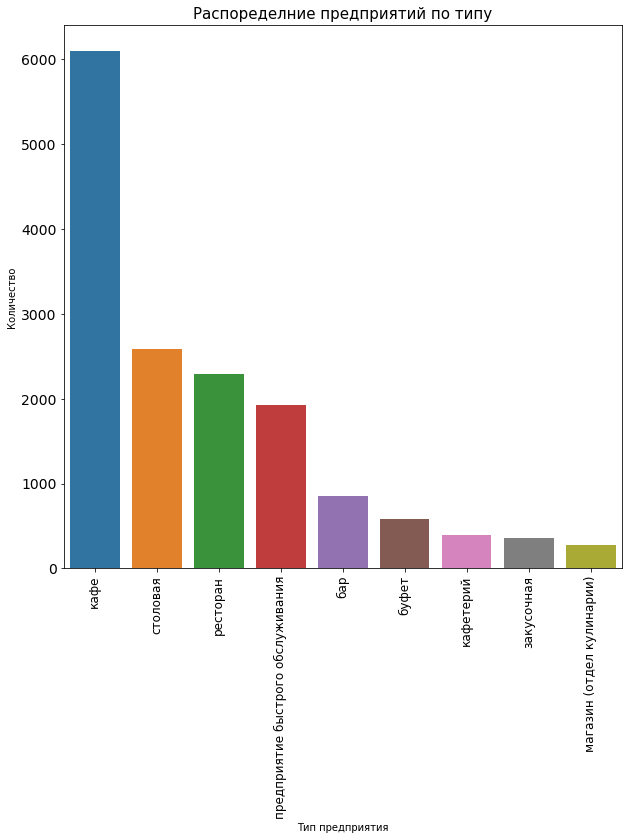

In [47]:
sns.axes_style("ticks")
g1_order = rest_df.groupby('object_type')['id'].count().sort_values(ascending=False).index.values
plt.figure(figsize=(10,10))
plt.xticks(rotation=90, size=12)
plt.yticks(size=14)
graph1 = sns.countplot(x='object_type', data=rest_df, order=g1_order)
plt.ylabel('Количество')
plt.xlabel('Тип предприятия')
graph1.axes.set_title('Распоределние предприятий по типу', fontsize=15)
plt.show()

#### Вывод
Наибольшее число предприятий в категории "кафе", больше 6 тыс. Что, в целом, не удивляет, т.к. это самое общее определение, в него входят очень много разных типов. 

### Соотношение сетевых и несетевых предприятий

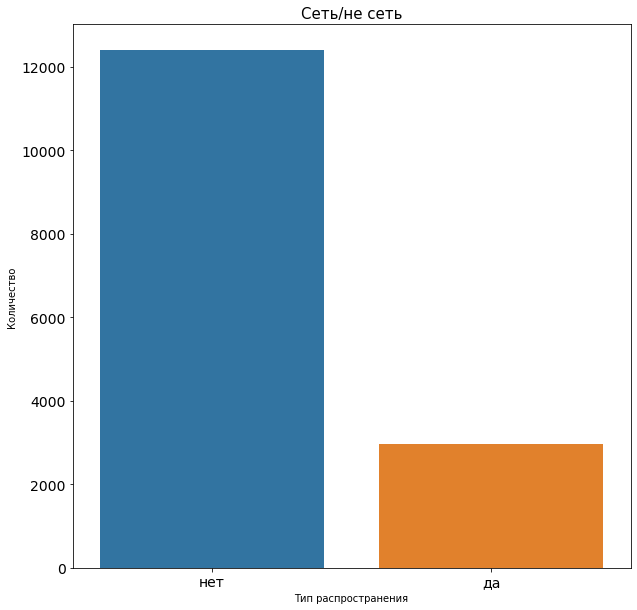

In [48]:
plt.figure(figsize=(10,10))
graph2 = sns.countplot(x='chain', data=rest_df)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Тип распространения')
plt.ylabel('Количество')
graph2.axes.set_title('Сеть/не сеть', fontsize=15)
plt.show()

#### Вывод
Заметно больше прдеприятий с несетевым типом. Цифры отличаются практически в 4 раза, достаточно сильное различие

### Распределние по категории и типу распространения

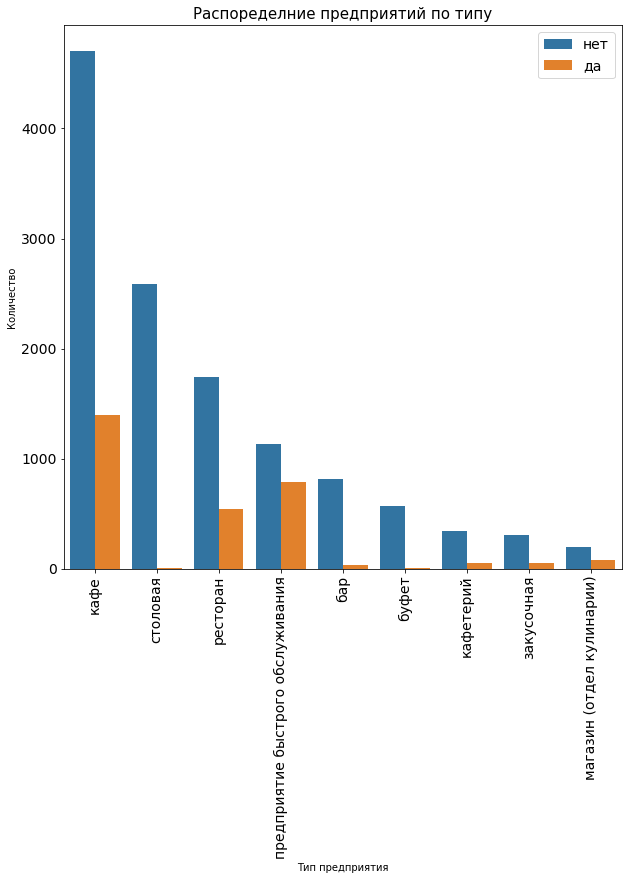

In [49]:
g3_order = rest_df.groupby('object_type')['id'].count().sort_values(ascending=False).index.values
plt.figure(figsize=(10,10))
graph3 = sns.countplot(x='object_type', hue='chain', data=rest_df, order=g1_order)
plt.xticks(rotation=90, size=14)
plt.yticks(size=14)
plt.xlabel('Тип предприятия')
plt.ylabel('Количество')
plt.legend(fontsize=14)
graph3.axes.set_title('Распоределние предприятий по типу', fontsize=15)
plt.show()
# Решил использовать такой вариант отображения для большей наглядности сравнения

#### Вывод
Наибольшее число сетевых предприятий относительно общего количества в категории - в предприятиях быстрого обслуживания. \
Так же стоит отметить, что в категориях "столовая" и "буфет" сети отсутсвуют польностью

### Характерность кол-ва посадочных мест для сетевых предпряитий

In [28]:
chain_rest = rest_df[rest_df['chain'] == 'да'].groupby('object_name')['id'].count().sort_values(ascending=False).head(30).index
chain_rest_for_plot = rest_df.query('object_name in @chain_rest')
# Решил в данном случае использовать выборку из верхней границы всех сетевых предприятий, отсортированных по кол-ву точек
# Т.к., в общем-то говоря, это будут самые показательные и полезные данные

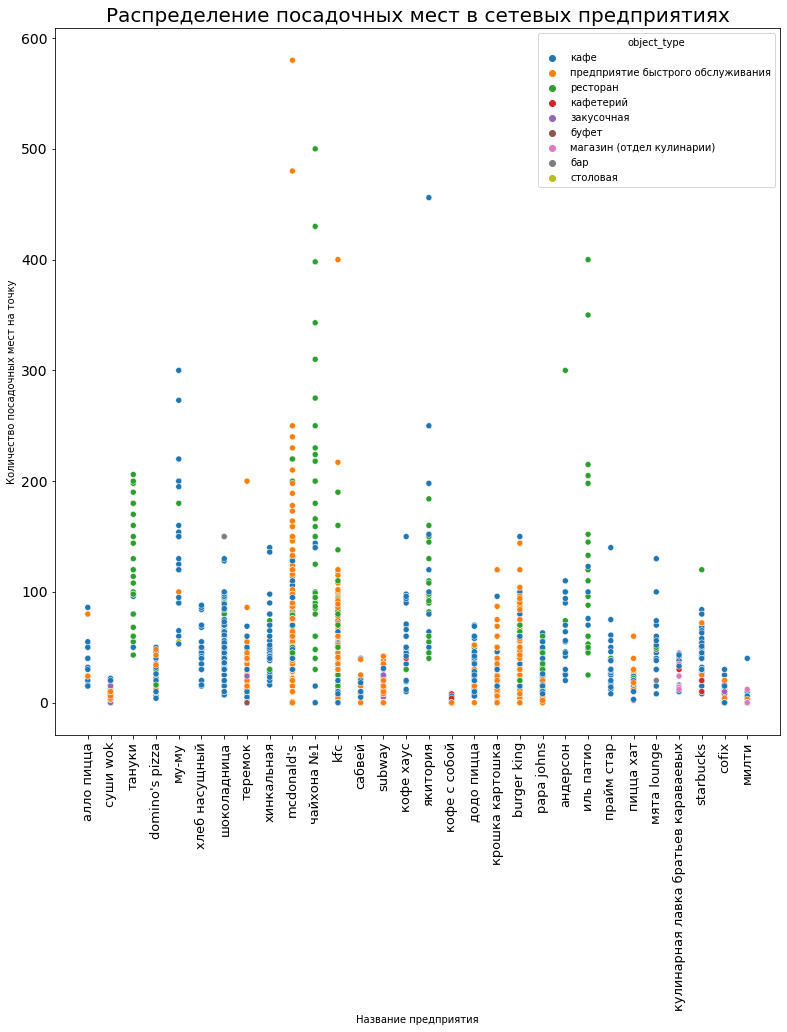

In [56]:
plt.figure(figsize=(13,13))
graph4 = sns.scatterplot(x='object_name', y='number', data=chain_rest_for_plot, hue='object_type')
plt.xticks(rotation=90, size=13)
plt.yticks(size=14)
plt.xlabel('Название предприятия')
plt.ylabel('Количество посадочных мест на точку')
graph4.axes.set_title('Распределение посадочных мест в сетевых предприятиях', fontsize=20)
plt.show()

#### Вывод
Можно сказать, что сетевые предприятия чаще используют модель "меньше мест, но больше точек". Основная масса данных лежит в пределах ста посадочных мест, таких предприятий больше всего. Есть различные выбросы (Мак-дак на 600 мест!), но учитывая специфику этого сектора бизнеса - такое вполне возможно в каком-нибудь ТЦ, аэропорте, вокзале или в каком-то подобном месте

### Среднее количество посадочных мест по типу

In [30]:
g5_order = rest_df.groupby('object_type')['number'].mean().sort_values(ascending=False).index

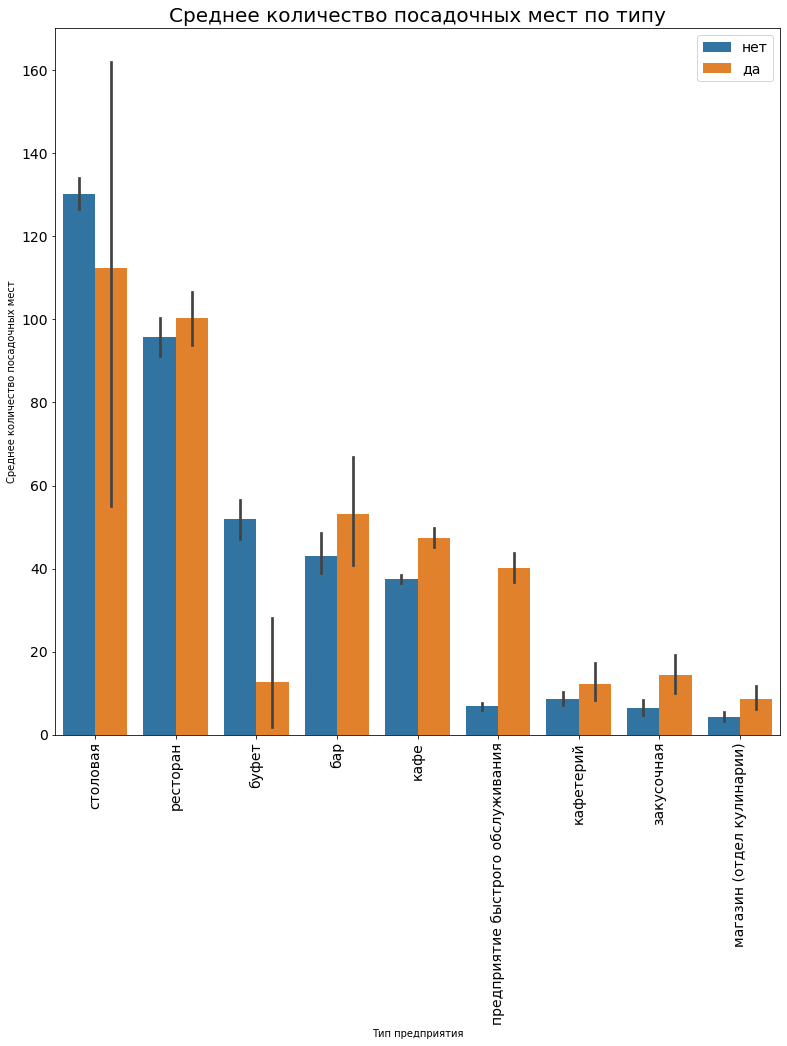

In [51]:
plt.figure(figsize=(13,13))
graph5 = sns.barplot(x='object_type', y='number', hue='chain', data=rest_df, order=g5_order)
plt.xticks(rotation=90, size=14)
plt.yticks(size=14)
plt.xlabel('Тип предприятия')
plt.ylabel('Среднее количество посадочных мест')
plt.legend(fontsize=14)
graph5.axes.set_title('Среднее количество посадочных мест по типу', fontsize=20)
plt.show()

#### Вывод
Самое большое количество посадочных мест в категории несетевых столовых. Среди ресторанов, баров, кафе и предприятий быстрого обслуживания первенство держат сетевые предприятия.

### Выделение улицы в отдельный столбец

In [32]:
rest_df['street_name'] = ''
def streets(row):
    address = row[4]
    address = address.split(', ')
    street = address[1]
    if  (((street.count('поселение') > 0) | 
          (street.count('поселок') > 0) |
          (street.count('деревня') > 0) |
          (street.count('корпус') > 0) |
          (street.count('город') > 0)) & 
         (len(address)>2)):
        address[1] = address[2]
    row[6] = address[1]
    return row
rest_df = rest_df.apply(streets, axis=1)
# Это не моё решение - нашёл в сети. Результат не совсем корректный, но как сделать ещё лучше - хз

In [33]:
rest_df

,id,object_name,chain,object_type,address,number,street_name
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50,3-й крутицкий переулок
15362,209264,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",10,улица земляной вал
15363,209186,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20,улица земляной вал
15364,221900,шоколадница,да,кафе,"город москва, поселение московский, киевское ш...",36,киевское шоссе


### Топ-10 улиц по количеству предприятий и их район

In [34]:
from io import BytesIO
import requests
file_name = 'https://docs.google.com/spreadsheets/d/1IFRht7_XqgTud5qaeNOVh2ic6GFN-iMOJHGXLTbaSaI/export?format=csv'
r = requests.get(file_name)
streets = pd.read_csv(BytesIO(r.content))
streets
# Подгрузил сторонний файл для определния района

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [35]:
streets_clear = streets.drop(streets[streets['streetname'].duplicated() == True].index)
# Некоторые улицы за счёт свой протяжённости проходят через несколько районов
# Т.к. если не убрать дубликаты отсюда, и замерджить как есть - дубликаты появятся в основом датасете
# Поэтому принял решение оставить по одному району на улицу

In [36]:
for col in ['streetname', 'area']:
    streets_clear[col] = streets_clear[col].str.lower()
# Приводим всё из нового датасета к одному регистру

In [37]:
rest_df_full = rest_df.merge(streets_clear, left_on='street_name', right_on='streetname', how='left')
rest_df_full.drop(['areaid', 'okrug', 'streetname'], axis=1, inplace=True)
# Объединяем датасеты, убираем ненужные столбцы

In [38]:
top10_streets = rest_df.groupby('street_name')['id'].count().sort_values(ascending=False).head(10).index

In [39]:
df_top10 = rest_df_full.query('street_name in @top10_streets')

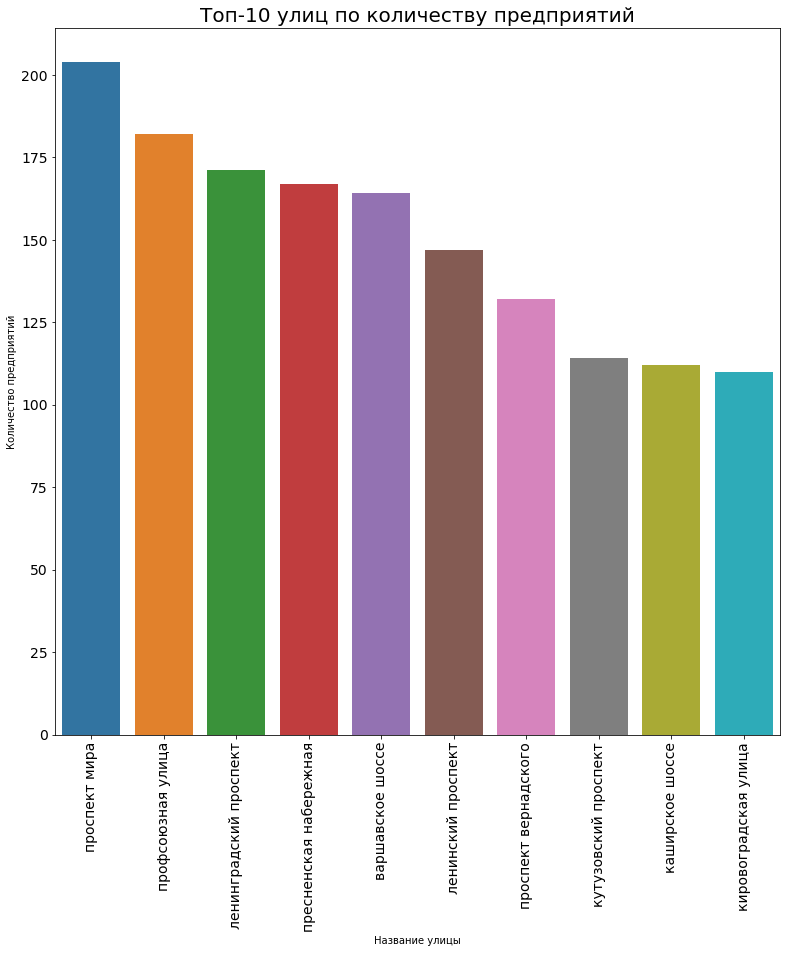

In [52]:
plt.figure(figsize=(13,13))
graph6 = sns.countplot(x='street_name', data=df_top10, order=top10_streets)
graph6.axes.set_title('Топ-10 улиц по количеству предприятий', fontsize=20)
plt.xlabel('Название улицы')
plt.ylabel('Количество предприятий')
plt.xticks(rotation=90, size=14)
plt.yticks(size=14)
plt.show()

In [41]:
streets_clear.query('streetname in @top10_streets')
# Вывел районы этих улиц

,streetname,areaid,okrug,area
72,пресненская набережная,17,ЦАО,пресненский район
1208,кутузовский проспект,38,ЗАО,район дорогомилово
1501,проспект вернадского,44,ЗАО,район проспект вернадского
1504,ленинский проспект,44,ЗАО,район проспект вернадского
1857,ленинградский проспект,54,САО,район аэропорт
2293,проспект мира,70,СВАО,алексеевский район
3105,варшавское шоссе,109,ЮАО,район чертаново центральное
3111,кировоградская улица,109,ЮАО,район чертаново центральное
3292,каширское шоссе,101,ЮАО,район москворечье-сабурово
3845,профсоюзная улица,123,ЮЗАО,академический район


#### Вывод
Больше всего предприятий находится на больших, длинных улицах (чаще проспектах/шоссе). Так же затесалась одна протяжённая набережная

### Улицы с одним предприятием

In [42]:
rests_by_street = rest_df_full.groupby('street_name')['id'].count().sort_values(ascending=False) # Кол-во предприятий по улицам
onerest_streets = rests_by_street[rests_by_street.values == 1].index # Улицы с одним предприятием
rest_df_full = rest_df_full.replace(float("NaN"), 0) # Не совсем понимаю, почему, но с первоначальным NaN ничего не работало
onerest_streets_df =  rest_df_full.query('street_name in @onerest_streets and area != 0')
graph7_order = onerest_streets_df.groupby('area')['id'].count().sort_values(ascending=False).index

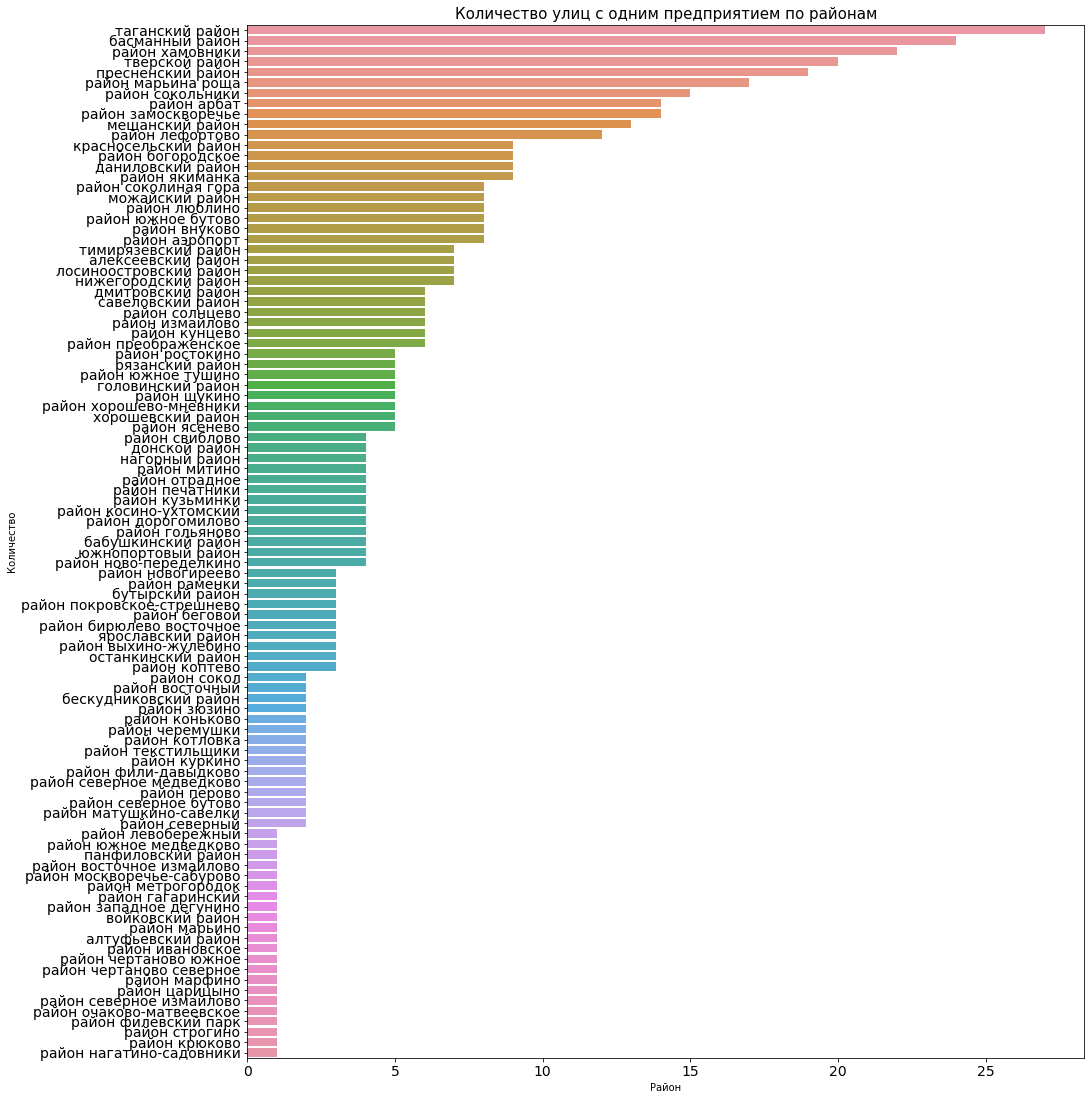

In [53]:
plt.figure(figsize=(15,19))
graph7 = sns.countplot(y='area', data=onerest_streets_df, order=graph7_order)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Район')
plt.ylabel('Количество')
graph7.axes.set_title('Количество улиц с одним предприятием по районам', fontsize=15)
plt.show()

#### Вывод
Наибольшее количество улиц с одним предприятием - в центральных районах города. Число таких улиц - 519

### Распределние посадочных мест на улицах с большим количеством предприятий

Возьмём за отметку число в 50 предприятий - это достаточно большая цифра для одной улицы

In [44]:
big_streets = rest_df_full.groupby('street_name')['id'].count()
big_streets_index = big_streets[big_streets.values >= 50].index # Выделил названия подходящих улиц
big_streets_for_graph = rest_df_full.query('street_name in @big_streets_index')

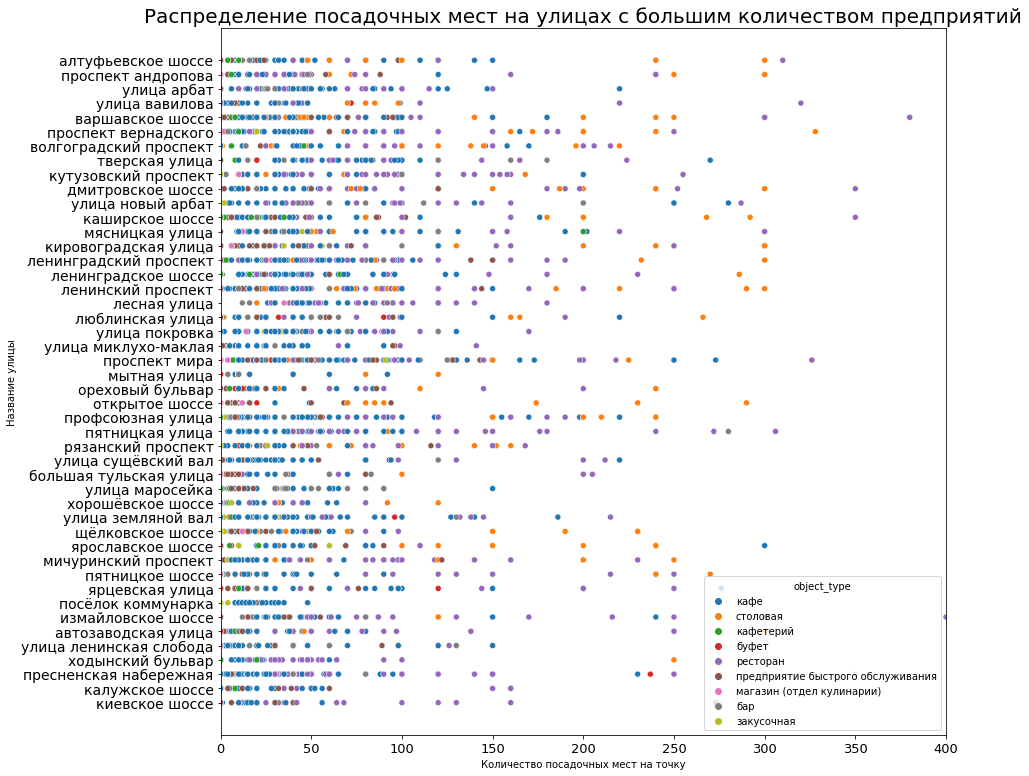

In [54]:
plt.figure(figsize=(13,13))
graph8 = sns.scatterplot(y='street_name', x='number', hue='object_type', data=big_streets_for_graph)
plt.xlim(0, 400) # Ограничим график от выбросов
plt.xticks(size=13)
plt.yticks(size=14)
plt.xlabel('Количество посадочных мест на точку')
plt.ylabel('Название улицы')
graph8.axes.set_title('Распределение посадочных мест на улицах с большим количеством предприятий', fontsize=20)
plt.show()

#### Вывод
На улицах с большим числом предприятий чаще всего встречаются предприятия с 50-100 посадочными местами. Встречаются так же и выбросы (до 1700 посадочны мест) \
Можно отметить, что рестораны и столовые смещены в большую сторону, в то время как кафе - в меньшую 

## Общий вывод
Для инвесторов я бы предложил следующее - открыть кафе/ресторан с роботами в центральном районе столицы, количество посадочных мест - не больше 100. Можно рассматривать расширение до сети, такая возможность есть. 